# Projeto: Shark Attack

Objetivos:
- Descobrir se há alguma indícios de perigosidade de algum dos oceanos
- Identificar quais informações são relevantes para este estudo
- Identificar se há correlação entre os ataques de tubarões e/ou fatalidades e a região do ataque

## Importação de bibliotecas e dados externos

In [1]:
import pandas as pd
import re
from matplotlib import pyplot as plt

In [2]:
shark_attack = pd.read_csv('archive.zip', compression='zip', encoding='ansi')
shark_attack.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Verificando DataFrame

In [3]:
shark_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [4]:
# aumentando a quantidade de colunas do dataframe a serem visualizadas

pd.options.display.max_columns = 25

In [5]:
# descobrindo erros nos nomes das colunas

shark_attack.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

##  Tratamento de linhas nulas

In [6]:
# criando uma coluna com a contagem de nulos em cada linha

shark_attack['Vazio'] = shark_attack.T.isnull().sum()

In [7]:
shark_attack.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Vazio
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,2
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,3
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN,3
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,4
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,4


In [8]:
shark_attack['Vazio'].value_counts()

24    17020
23     2394
3      1515
2      1423
4      1202
5      1194
6       540
7       293
8       102
9        26
22        7
10        7
Name: Vazio, dtype: int64

In [9]:
# criando um dataframe com todas as linhas que possuem menos de 20 colunas vazias

f_shark = shark_attack.drop(shark_attack[shark_attack['Vazio'] > 20].index)

In [10]:
# verificando a quantidade de linhas x colunas vazias

f_shark['Vazio'].value_counts()

3     1515
2     1423
4     1202
5     1194
6      540
7      293
8      102
9       26
10       7
Name: Vazio, dtype: int64

##  Escolha de colunas relevantes

In [11]:
f_shark['Unnamed: 23'].value_counts()

change filename    1
Teramo             1
Name: Unnamed: 23, dtype: int64

In [12]:
f_shark.loc[~f_shark['Unnamed: 23'].isnull(), :]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Vazio
4415,1952.03.30,30-Mar-1952,1952.0,Unprovoked,NETHERLANDS ANTILLES,Curacao,NaN,Went to aid of child being menaced by the shark,A.J. Eggink,M,NaN,"Buttock bitten, tissue removed",N,NaN,"Bull shark, 2.7 m [9'] was captured & dragged ...","J. Randall, p.352 in Sharks & Survival; H.D. B...",1952.03.30-Eggink.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.03.30,1952.03.30,1888.0,NaN,Teramo,4
5840,1878.09.14.R,Reported 14-Sep-1878,1878.0,Provoked,USA,Connecticut,"Branford, New Haven County",Fishing,Captain Pattison,M,NaN,Leg bitten by netted shark PROVOKED INCIDENT,N,NaN,NaN,"St. Joseph Herald, 9/14/1878",1878.09.14.R-Pattison.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1878.09.14.R,1878.09.14.R,463.0,NaN,change filename,4


In [13]:
# escolhendo as colunas relevantes

f_shark = f_shark[['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex ', 'Injury',
                   'Fatal (Y/N)', 'Species ']]

In [14]:
# renomeando as colunas

f_shark.columns = ['date', 'year', 'type', 'country', 'area', 'location', 'activity', 'name', 'sex', 'injury',
                 'fatal', 'species']

In [15]:
f_shark.tail()

,date,year,type,country,area,location,activity,name,sex,injury,fatal,species
6297,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,FATAL,Y,NaN
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,FATAL,Y,NaN
6299,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,FATAL,Y,NaN
6300,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,FATAL,Y,NaN
6301,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN


## Tratamento de ano

In [16]:
# verificando linhas cujo ano pode ser completado com informação da coluna de data

f_shark.loc[~(f_shark['date']).isnull() & (f_shark['year'].isnull()), 'date']

187     Reported 08-Jan-2017
6079    Reported 19-Aug-1836
Name: date, dtype: object

In [17]:
# preenchendo valor de ano com informação de data

f_shark.loc[~(f_shark['date']).isnull() & (f_shark['year'].isnull()), 'year'] = f_shark.loc[~(f_shark['date']).isnull() & (f_shark['year'].isnull()), 'date'].str.slice(start=-4)

In [18]:
# verificando linhas cujo ano pode ser completado com informação da coluna de data

f_shark.loc[~(f_shark['date']).isnull() & ((f_shark['year']==0) | (f_shark['year'].isnull())), 'date']

6177     Ca. 214 B.C.
6178    Ca. 336.B.C..
6179         493 B.C.
6180     Ca. 725 B.C.
6181      Before 1939
            ...      
6297      Before 1903
6298      Before 1903
6299        1900-1905
6300        1883-1889
6301        1845-1853
Name: date, Length: 125, dtype: object

In [19]:
# substituindo zeros da coluna de anos com valores disponíveis na coluna data

filtro_ano = f_shark.loc[(f_shark['year']==0), 'date'].apply(lambda data: True if re.search('\d{3,}', str(data)) else False)
f_shark.loc[(f_shark['year']==0) & filtro_ano, 'year'] = f_shark.loc[(f_shark['year']==0) & filtro_ano, 'date'].apply(lambda data: re.findall('\d{3,}', str(data))[0])

In [20]:
# verificando dados após o tratamento

f_shark['year'].isnull().sum()

0

In [21]:
# transformando coluna ano em inteiros

f_shark['year'] = f_shark['year'].astype(int)

##  Tratamento de tipo de incidente

In [22]:
f_shark['type'].value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: type, dtype: int64

In [23]:
# ajustando os valores de barcos

boat = f_shark['type'].apply(lambda tipo: True if re.search('^boat', str(tipo).lower()) else False)
f_shark.loc[boat, 'type'] = 'Boat'

In [24]:
# agrupando valores

f_shark.loc[f_shark['type']=='Sea Disaster', 'type'] = 'Unprovoked'
f_shark.loc[f_shark['type']=='Questionable', 'type'] = 'Invalid'

In [25]:
# verificando dados tratados

f_shark['type'].value_counts()

Unprovoked    4834
Provoked       574
Invalid        549
Boat           341
Name: type, dtype: int64

## Tratamento de país

In [26]:
f_shark['country']

0                      USA
1                      USA
2                      USA
3                AUSTRALIA
4                   MEXICO
               ...        
6297             AUSTRALIA
6298             AUSTRALIA
6299                   USA
6300                PANAMA
6301    CEYLON (SRI LANKA)
Name: country, Length: 6302, dtype: object

In [27]:
f_shark.loc[(f_shark['country'].isnull()) & (f_shark['area'].isnull()) & (f_shark['location'].isnull()), :].shape

(29, 12)

In [28]:
# verificando linhas sem informação de país

f_shark.loc[(f_shark['country'].isnull()) & (~(f_shark['area'].isnull()) | ~(f_shark['location'].isnull())), ['country', 'area', 'location']]

,country,area,location
2956,NaN,English Channel,NaN
3387,NaN,Caribbean Sea,Between St. Kitts & Nevis
3605,NaN,NaN,Florida Strait
4018,NaN,"Between Timor & Darwin, Australia",NaN
4231,NaN,Near the Andaman & Nicobar Islands,NaN
4266,NaN,Between Comores & Madagascar,Geyser Bank
4498,NaN,Caribbean Sea,Between Cuba & Costa Rica
4639,NaN,NaN,225 miles east of Hong Kong
4700,NaN,Off South American coast,NaN
4712,NaN,300 miles east of St. Thomas (Virgin Islands),NaN


In [29]:
# substituindo campos 'country' nulos por informações das colunas 'area' ou 'location'

f_shark.loc[(f_shark['country'].isnull()) & ((f_shark['area']=='St Helena') | ~(f_shark['area'].isnull())), 'country'] = f_shark.loc[(f_shark['country'].isnull()) & ((f_shark['area']=='St Helena') | ~(f_shark['area'].isnull())), 'area']
f_shark.loc[(f_shark['country'].isnull()) & ~(f_shark['location'].isnull()), 'country'] = f_shark.loc[(f_shark['country'].isnull()) & ~(f_shark['location'].isnull()), 'location']

In [30]:
# ajustando nomes de paises

f_shark.loc[~(f_shark['country'].isnull()), 'country'] = f_shark.loc[~(f_shark['country'].isnull()), 'country'].apply(lambda place: re.sub(' ?[\/\(,].*', '', str(place).upper()) if len(str(place))>0 else None)
f_shark.loc[~(f_shark['country'].isnull()), 'country'] = f_shark.loc[~(f_shark['country'].isnull()), 'country'].str.lstrip(' ')
f_shark.loc[~(f_shark['country'].isnull()), 'country'] = f_shark.loc[~(f_shark['country'].isnull()), 'country'].str.rstrip('[ ?]')

In [31]:
# Verificando os nomes dos países

paises = sorted(list(f_shark['country'].value_counts().index))
print(paises)

['225 MILES EAST OF HONG KONG', '300 MILES EAST OF ST. THOMAS', 'ADMIRALTY ISLANDS', 'AFRICA', 'ALGERIA', 'AMERICAN SAMOA', 'ANDAMAN', 'ANDAMAN ISLANDS', 'ANGOLA', 'ANTIGUA', 'ARGENTINA', 'ARUBA', 'ASIA', 'ATLANTIC OCEAN', 'AUSTRALIA', 'AZORES', 'BAHAMAS', 'BAHREIN', 'BANGLADESH', 'BARBADOS', 'BAY OF BENGAL', 'BELIZE', 'BERMUDA', 'BETWEEN COMORES & MADAGASCAR', 'BETWEEN PORTUGAL & INDIA', 'BETWEEN TIMOR & DARWIN', 'BRAZIL', 'BRITISH ISLES', 'BRITISH NEW GUINEA', 'BRITISH VIRGIN ISLANDS', 'BRITISH WEST INDIES', 'BURMA', 'CANADA', 'CAPE VERDE', 'CARIBBEAN SEA', 'CARLISLE BAY', 'CAYMAN ISLANDS', 'CENTRAL PACIFIC', 'CEYLON', 'CHILE', 'CHINA', 'COAST OF AFRICA', 'COLUMBIA', 'COMOROS', 'COOK ISLANDS', 'COSTA RICA', 'CRETE', 'CROATIA', 'CUBA', 'CURACAO', 'CYPRUS', 'DIEGO GARCIA', 'DJIBOUTI', 'DOMINICAN REPUBLIC', 'ECUADOR', 'EGYPT', 'EL SALVADOR', 'ENGLAND', 'ENGLISH CHANNEL', 'EQUATORIAL GUINEA', 'FALKLAND ISLANDS', 'FEDERATED STATES OF MICRONESIA', 'FIJI', 'FLORIDA STRAIT', 'FRANCE', 'FRENC

In [32]:
# agrupando alguns países

f_shark.loc[f_shark['country'] == '225 MILES EAST OF HONG KONG', 'country'] = 'HONG KONG'
f_shark.loc[f_shark['country'] == '300 MILES EAST OF ST. THOMAS', 'country'] = 'ST. THOMAS'
f_shark.loc[f_shark['country'] == 'TOBAGO', 'country'] = 'TRINIDAD & TOBAGO'
f_shark.loc[f_shark['country'] == 'REUNION ISLAND', 'country'] = 'REUNION'
f_shark.loc[f_shark['country'] == 'NEW GUINEA', 'country'] = 'PAPUA NEW GUINEA'
f_shark.loc[f_shark['country'] == 'BRITISH NEW GUINEA', 'country'] = 'PAPUA NEW GUINEA'
f_shark.loc[f_shark['country'] == 'OKINAWA', 'country'] = 'JAPAN'
f_shark.loc[f_shark['country'] == 'ST. MAARTIN', 'country'] = 'ST. MARTIN'
f_shark.loc[f_shark['country'] == 'SOUTH CHINA SEA', 'country'] = 'CHINA'
f_shark.loc[f_shark['country'] == 'BETWEEN COMORES & MADAGASCAR', 'country'] = 'MADAGASCAR'
f_shark.loc[f_shark['country'] == 'BETWEEN PORTUGAL & INDIA', 'country'] = 'PORTUGAL'
f_shark.loc[f_shark['country'] == 'BETWEEN TIMOR & DARWIN, AUSTRALIA', 'country'] = 'AUSTRALIA'
f_shark.loc[f_shark['country'] == 'MALDIVE ISLANDS', 'country'] = 'MALDIVES'
f_shark.loc[f_shark['country'] == 'GULF OF CALIFORNIA', 'country'] = 'USA'
f_shark.loc[f_shark['country'] == 'FLORIDA STRAIT', 'country'] = 'USA'
f_shark.loc[f_shark['country'] == 'GEORGIA', 'country'] = 'USA'
f_shark.loc[f_shark['country'] == 'FEDERATED STATES OF MICRONESIA', 'country'] = 'MICRONESIA'
f_shark.loc[f_shark['country'] == 'GRAND CAYMAN', 'country'] = 'CAYMAN ISLANDS'
f_shark.loc[f_shark['country'] == 'NEAR THE ANDAMAN & NICOBAR ISLANDS', 'country'] = 'ANDAMAN'
f_shark.loc[f_shark['country'] == 'ANDAMAN ISLANDS', 'country'] = 'ANDAMAN'
f_shark.loc[f_shark['country'] == 'TASMAN SEA', 'country'] = 'AUSTRALIA'
f_shark.loc[f_shark['country'] == 'CEYLON', 'country'] = 'SRI LANKA'
f_shark.loc[f_shark['country'] == 'ENGLISH CHANNEL', 'country'] = 'UNITED KINGDOM'
f_shark.loc[f_shark['country'] == 'BRITISH ISLES', 'country'] = 'UNITED KINGDOM'
f_shark.loc[f_shark['country'] == 'ENGLAND', 'country'] = 'UNITED KINGDOM'
f_shark.loc[f_shark['country'] == 'SCOTLAND', 'country'] = 'UNITED KINGDOM'
f_shark.loc[f_shark['country'] == 'IN A RIVER FEEDING INTO THE BAY OF BENGAL', 'country'] = 'BAY OF BENGAL'

In [33]:
f_shark['country'].value_counts()

USA                 2232
AUSTRALIA           1339
SOUTH AFRICA         579
PAPUA NEW GUINEA     145
NEW ZEALAND          128
                    ... 
BAHREIN                1
CARLISLE BAY           1
ASIA                   1
GUATEMALA              1
AFRICA                 1
Name: country, Length: 182, dtype: int64

In [34]:
# Verificando campos nulos

f_shark['country'].isnull().sum()

29

## Agrupado em dados de oceanos/mar

In [35]:
f_shark['ocean']=f_shark['country']

In [36]:
oceano = 'OCEAN|SEA|BAY|GULF'

lista = sorted(list(f_shark.loc[~(f_shark['ocean'].isnull()), 'ocean'].apply(lambda pais: pais if re.search(oceano, pais.upper()) else None).value_counts().index))
lista

['ATLANTIC OCEAN',
 'BAY OF BENGAL',
 'CARIBBEAN SEA',
 'CARLISLE BAY',
 'GULF OF ADEN',
 'INDIAN OCEAN',
 'IONIAN SEA',
 'MEDITERRANEAN SEA',
 'MID ATLANTIC OCEAN',
 'MID-PACIFC OCEAN',
 'NORTH ATLANTIC OCEAN',
 'NORTH PACIFIC OCEAN',
 'NORTH SEA',
 'NORTHERN ARABIAN SEA',
 'OCEAN',
 'PACIFIC OCEAN',
 'PERSIAN GULF',
 'RED SEA',
 'SOUTH ATLANTIC OCEAN',
 'SOUTH PACIFIC OCEAN',
 'SOUTHWEST PACIFIC OCEAN']

In [37]:
## ATENÇÃO ###
# célula destinada a verificar dados de uma linha específica

f_shark.loc[f_shark['ocean']=='PALESTINIAN TERRITORIES', :]

,date,year,type,country,area,location,activity,name,sex,injury,fatal,species,ocean
674,23-May-2013,2013,Provoked,PALESTINIAN TERRITORIES,NaN,Gaza,Fishing,Hamed Salah,M,Two fingers lost PROVOKED INCIDENT,N,NaN,PALESTINIAN TERRITORIES


###  Filtrando oceanos pelas colunas oceano e área

In [38]:
# substituindo locais do Oceano Atlântico

atl_keys = 'atlant|caribb|mediterr|north s'
filtro_atl = (f_shark['ocean'].apply(lambda pais: True if re.search(atl_keys, str(pais).lower()) else False)) | (f_shark['area'].apply(lambda pais: True if re.search(atl_keys, str(pais).lower()) else False))
f_shark.loc[filtro_atl, 'ocean'] = 'ATLANTIC OCEAN'

In [39]:
# substituindo locais do Oceano Pacífico

pcf_keys = 'pacif'
filtro_pcf = (f_shark['ocean'].apply(lambda pais: True if re.search(pcf_keys, str(pais).lower()) else False)) | (f_shark['area'].apply(lambda pais: True if re.search(pcf_keys, str(pais).lower()) else False))
f_shark.loc[filtro_pcf, 'ocean'] = 'PACIFIC OCEAN'

In [40]:
# substituindo locais do Oceano Índico

ind_keys = 'india|persian|red sea'
filtro_ind = (f_shark['ocean'].apply(lambda pais: True if re.search(ind_keys, str(pais).lower()) else False)) | (f_shark['area'].apply(lambda pais: True if re.search(ind_keys, str(pais).lower()) else False))
f_shark.loc[filtro_ind, 'ocean'] = 'INDIAN OCEAN'

###  Filtrando oceanos por países

In [41]:
#filtrando por paises no Oceano Atlântico

pais_atl = 'carlisle|st helena|brazil|haiti|honduras|argentina|peru|ecuador|venezu|columbia|spain|sloven|norw|guinea|georgia|aruba|gabon|angol|belize|crete|cayman|grenada|dominic|liberia|nigeria|france|united ki|scotl|turkey|el salv|england|ireland|azor|icel|falkl|guyana|cape v|florida|namib|curacao|bahamas|roatan|antigu|bermud|portugal|ghana|sierra|thomas|barbados|cuba|jamaica|puerto|artin|tobago|caico|urug|ionian|greece|croatia|italy|israel|lebanon|malta|monaco|montenegro|balkan|tunisia|libya|syria|alger|cypr'

filtro_atl = f_shark['ocean'].apply(lambda pais: True if re.search(pais_atl, str(pais).lower()) else False)
f_shark.loc[filtro_atl, 'ocean'] = 'ATLANTIC OCEAN'

In [42]:
#filtrando por paises no Oceano Pacífico

pais_pcf = 'china sea|tasman|^ocean|california|korea|japan|marshal|canada|kiribati|philippines|admir|tonga|asia|costa r|nicar|seneg|malay|singap|russia|mariana|hong kong|cook|johnston|solomon|guam|chile|fiji|microne|thail|palau|new brit|polyne|maldiv|zealand|samoa|okinawa|papua|new guinea|taiwan|tuvalu|vanuatu|caled|china|timor|vietn'

filtro_pcf = f_shark['ocean'].apply(lambda pais: True if re.search(pais_pcf, str(pais).lower()) else False)
f_shark.loc[filtro_pcf, 'ocean'] = 'PACIFIC OCEAN'

In [43]:
#filtrando por paises no Oceano Índico

pais_ind = 'bengal|arabian sea|aden|madagascar|reunion|mozamb|andam|egypt|bahrein|diego g|saudi a|arab em|mayote|burma|comoros|yeme|indonesia|java|banglad|maurit|keny|djib|seyc|sri|ceyl|tanza|somal|kuwai|iran|iraq'

filtro_ind = f_shark['ocean'].apply(lambda pais: True if re.search(pais_ind, str(pais).lower()) else False)
f_shark.loc[filtro_ind, 'ocean'] = 'INDIAN OCEAN'

### Tratamento dados dos EUA 

In [44]:
# filtrando dados dos EUA

f_shark.loc[(f_shark['ocean']=='USA'), 'area'].value_counts()

Florida                   1037
Hawaii                     298
California                 290
South Carolina             159
North Carolina             101
Texas                       73
New Jersey                  52
New York                    30
Oregon                      29
Virginia                    19
Puerto Rico                 16
Massachusetts               16
Alabama                     15
Georgia                     14
Louisiana                   11
Maryland                     7
Rhode Island                 7
Delaware                     7
Connecticut                  6
US Virgin Islands            5
Mississippi                  5
New York                     3
Palmyra Atoll                2
North Carolina               2
East coast                   2
Washington                   2
Kentucky                     1
Guam                         1
 North Carolina              1
Illinois                     1
New Mexico                   1
Pennsylvania                 1
Wake Isl

In [45]:
f_shark.loc[(f_shark['ocean']=='USA') & (f_shark['area']=='New Mexico'), :]

,date,year,type,country,area,location,activity,name,sex,injury,fatal,species,ocean
1605,12-Mar-2005,2005,Provoked,USA,New Mexico,"Albuquerue Aquarium, Albuquerue",Diving in aquarium display tank,Ken Pitts,M,2 punctures on forearm as captive shark collid...,N,"Sandtiger shark, 2.1 m [7']",USA


In [46]:
# Filtrando os incidentes no lado Pacífico dos EUA

usa_pcf = 'hawai|califo|alas|atoll|guam|washin|oreg'

filtro_usa_pcf = (f_shark['area'].apply(lambda pais: True if re.search(usa_pcf, str(pais).lower()) else False)) & (f_shark['country']=='USA')
f_shark.loc[filtro_usa_pcf, 'ocean'] = 'PACIFIC OCEAN'

In [47]:
# Preenchendo os outros incidentes dos EUA com Atlântico

f_shark.loc[(f_shark['country']=='USA') & (f_shark['ocean'] != 'PACIFIC OCEAN'), 'ocean'] = 'ATLANTIC OCEAN'

###  Tratamento dados da Austrália

In [48]:
# Verificando dados da Austrália

f_shark.loc[(f_shark['ocean']=='AUSTRALIA'), 'area'].value_counts()

New South Wales                         486
Queensland                              311
Western Australia                       189
South Australia                         104
Victoria                                 90
Torres Strait                            70
Tasmania                                 41
Northern Territory                       23
Westerm Australia                         3
Torres Strait                             2
Victoria                                  2
35º39 : 165º8'                            1
Territory of Cocos (Keeling) Islands      1
Norfolk Island                            1
Queensland                                1
Name: area, dtype: int64

In [49]:
# Filtrando os incidentes no lado Índico da Austrália

aus_ind = 'western|south aus|keeling'

filtro_aus_ind = (f_shark['area'].apply(lambda pais: True if re.search(aus_ind, str(pais).lower()) else False)) & (f_shark['country']=='AUSTRALIA')
f_shark.loc[filtro_aus_ind, 'ocean'] = 'INDIAN OCEAN'

In [50]:
# Preenchendo os outros incidentes da Austrália com Pacífico

f_shark.loc[(f_shark['country']=='AUSTRALIA') & (f_shark['ocean'] != 'INDIAN OCEAN'), 'ocean'] = 'PACIFIC OCEAN'

###  Tratamento dados da África do Sul

In [51]:
# filtrando dados da África do Sul

f_shark.loc[(f_shark['ocean']=='SOUTH AFRICA'), 'area'].value_counts()

KwaZulu-Natal                                          213
Western Cape Province                                  195
Eastern Cape Province                                  160
Eastern Cape  Province                                   1
KwaZulu-Natal between Port Edward and Port St Johns      1
Transvaal                                                1
Western Province                                         1
Eastern Province                                         1
Name: area, dtype: int64

In [52]:
# Filtrando os incidentes no lado Atlântico da África do Sul

afs_atl = 'western|atlant'

filtro_afs_atl = (f_shark['area'].apply(lambda pais: True if re.search(afs_atl, str(pais).lower()) else False)) & (f_shark['country']=='SOUTH AFRICA')
f_shark.loc[filtro_afs_atl, 'ocean'] = 'ATLANTIC OCEAN'

In [53]:
# Preenchendo os outros incidentes da África do Sul com Índico

f_shark.loc[(f_shark['country']=='SOUTH AFRICA') & (f_shark['ocean'] != 'ATLANTIC OCEAN'), 'ocean'] = 'INDIAN OCEAN'

###  Tratamento dados do México

In [54]:
# filtrando dados do México

f_shark.loc[(f_shark['ocean']=='MEXICO'), 'area'].value_counts()

Veracruz               15
Guerrero               13
Quintana Roo           12
Baja California        10
Tamaulipas              5
Guerro                  4
Colima                  4
Sinaloa                 3
Guerrrero               3
Vera Cruz               3
Veracruz                2
Oaxaca                  2
Bay of Campeche         1
Tabasco                 1
Baja California Sur     1
Cabo San Lucas          1
Guyamas                 1
Name: area, dtype: int64

In [55]:
# Filtrando os incidentes no lado Atlântico do México

mex_atl = 'vera|quint|tamau|carib|taba|campe'

filtro_mex_atl = (f_shark['area'].apply(lambda pais: True if re.search(mex_atl, str(pais).lower()) else False)) & (f_shark['country']=='MEXICO')
f_shark.loc[filtro_mex_atl, 'ocean'] = 'ATLANTIC OCEAN'

In [56]:
# Preenchendo os outros incidentes do México com Pacífico

f_shark.loc[(f_shark['country']=='MEXICO') & (f_shark['ocean'] != 'ATLANTIC OCEAN'), 'ocean'] = 'PACIFIC OCEAN'

###  Tratamento dados da Espanha

###  Tratamento dados do Panamá

In [57]:
# Filtrando os incidentes no lado Pacífico do Panamá

pnm_pcf = 'gulf'

filtro_pnm_pcf = (f_shark['area'].apply(lambda pais: True if re.search(pnm_pcf, str(pais).lower()) else False)) & (f_shark['country']=='PANAMA')
f_shark.loc[filtro_pnm_pcf, 'area'] = 'PACIFIC OCEAN'

In [58]:
# Preenchendo os outros incidentes do Panamá com Atlântico

f_shark.loc[(f_shark['country']=='PANAMA') & (f_shark['ocean'] != 'PACIFIC OCEAN'), 'ocean'] = 'ATLANTIC OCEAN'

###  Verificação

In [59]:
# verificando 

paises = sorted(list(f_shark['ocean'].value_counts().index))
print(paises)

['AFRICA', 'ATLANTIC OCEAN', 'BRITISH VIRGIN ISLANDS', 'BRITISH WEST INDIES', 'COAST OF AFRICA', 'FRENCH SOUTHERN TERRITORIES', 'GREENLAND', 'GUATEMALA', 'INDIAN OCEAN', 'MAYOTTE', 'NEAR THE EQUATOR', 'NETHERLANDS ANTILLES', 'NEVIS', 'OFF SOUTH AMERICAN COAST', 'PACIFIC OCEAN', 'PALESTINIAN TERRITORIES', 'PARAGUAY', 'SAN DOMINGO', 'SANTA CRUZ', 'WEST INDIES', 'WESTERN BANKS']


In [60]:
# verificando linhas sem nenhuma informação do local

f_shark.loc[f_shark['ocean'].isnull(), :].shape

(29, 13)

In [61]:
f_shark['ocean'].value_counts()

ATLANTIC OCEAN                 2811
PACIFIC OCEAN                  2396
INDIAN OCEAN                   1047
WEST INDIES                       2
GUATEMALA                         1
WESTERN BANKS                     1
GREENLAND                         1
BRITISH WEST INDIES               1
COAST OF AFRICA                   1
SAN DOMINGO                       1
SANTA CRUZ                        1
AFRICA                            1
NEAR THE EQUATOR                  1
PALESTINIAN TERRITORIES           1
OFF SOUTH AMERICAN COAST          1
BRITISH VIRGIN ISLANDS            1
NEVIS                             1
PARAGUAY                          1
MAYOTTE                           1
FRENCH SOUTHERN TERRITORIES       1
NETHERLANDS ANTILLES              1
Name: ocean, dtype: int64

## Tratamento de mês

<b> Esta frente foi abandonada !!!</b>

def class_per(data):
    '''
    '''
    pad_mes = 'jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec'
    pad_est = 'fall|summer|winter|spring'
    
    if re.search(pad_mes, data.lower):
        per = 
        return re.findall(pad_)

pat_month = 'jan|feb|mar|ap[r]?|may|jun|jul|aug|sep|oct|nov|dec|fall|summer|winter|spring'

f_shark['month'] = f_shark['date'].apply(lambda date: re.findall(pat_month, date.lower())[0] if re.search(pat_month, date.lower()) else 0)

f_shark['month'].value_counts()

f_shark['month'] = f_shark['date'].apply(lambda date: re.sub('\d{4}', '', date))

f_shark['month']

f_shark.loc[f_shark['month']== 0, 'date'].apply(lambda date: re.findall('\.(\d{2})\.', date))

f_shark.loc[f_shark['month']==0, 'date'].apply(lambda date: re.sub('\d{4}', '', date)).value_counts()

## Tratamento de gênero

In [62]:
# verificando coluna de gênero

f_shark['sex'].value_counts()

M      5094
F       637
N         2
M         2
lli       1
.         1
Name: sex, dtype: int64

In [63]:
# verificando linhas que não possuem nem informação de gênero e nem de nome

f_shark.loc[(f_shark['sex'].isnull()) & (f_shark['name'].isnull()), :]

,date,year,type,country,area,location,activity,name,sex,injury,fatal,species,ocean
32,09-Apr-2018,2018,Unprovoked,NEW CALEDONIA,NaN,"Magenta Beach, Noumea",Windsurfing,NaN,NaN,"No injury, shark bit board",N,2 m shark,PACIFIC OCEAN
86,Sep-2017,2017,Boat,AUSTRALIA,Westerm Australia,Esperance,Fishing,NaN,NaN,"sharks rammed boats, no injury to occupants",N,"White shark, 3.5m",PACIFIC OCEAN
124,02-Jul-2017,2017,Invalid,COMOROS,Anjouan,Moya,Fishing,NaN,NaN,"Skull found in shark, a probable drowning & sc...",NaN,Shark involvement prior to death not confirmed,INDIAN OCEAN
154,17-Apr-2017,2017,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",NaN,NaN,NaN,Minor bite to the foot,N,NaN,ATLANTIC OCEAN
226,Sep-2016,2016,Invalid,MEXICO,NaN,Guadalupe Island,Cage Diving,NaN,NaN,"No injury to divers, white shark breached cage",NaN,Invalid,PACIFIC OCEAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6157,1733,1733,Invalid,ICELAND,Bardestrand,Talkknefiord,NaN,NaN,NaN,"Partial hominid remains recovered from shark, ...",NaN,Shark involvement prior to death unconfirmed,ATLANTIC OCEAN
6185,Before 1934,1934,Unprovoked,URUGUAY,Rocha,"Isla Chica, La Paloma",Swimming,NaN,NaN,Foot bitten,N,NaN,ATLANTIC OCEAN
6197,Before 2012,2012,Unprovoked,SPAIN,Canary Islands,Tenerife,Skin diving,NaN,NaN,Injury required 16 stitches,N,NaN,ATLANTIC OCEAN
6237,"No date, Before 1963",1963,Unprovoked,SINGAPORE,NaN,"Keppel Harbor, 2 miles from Singapore city ce...",Swimming,NaN,NaN,Recovered,N,NaN,PACIFIC OCEAN


In [64]:
# verificando se há informações de incidentes com mulheres nos registros com coluna de gênero nula e substituindo

filtro_fem = f_shark.loc[(f_shark['sex'].isnull()) & ~(f_shark['name'].isnull()), 'name'].apply(lambda name: True if re.search('wom[ae]n', str(name)) else False)

f_shark.loc[(f_shark['sex'].isnull()) & ~(f_shark['name'].isnull()) & filtro_fem, 'sex'] = 'F'

In [65]:
# ajustando valores da coluna de gênero

f_shark.loc[(f_shark['sex'] != 'M') & (f_shark['sex'] != 'F') & ~(f_shark['sex'].isnull()), 'sex'] = 'M'

In [66]:
f_shark['sex'].value_counts()

M    5100
F     639
Name: sex, dtype: int64

## Tratamento de fatalidade

In [67]:
f_shark['fatal'].value_counts()

N          4293
Y          1388
UNKNOWN      71
 N            7
2017          1
y             1
M             1
N             1
Name: fatal, dtype: int64

In [68]:
# verificando dados que não tem informação de fatalidade e nem de ferimentos

f_shark.loc[(f_shark['injury'].isnull()) & (f_shark['fatal'].isnull()), :]

,date,year,type,country,area,location,activity,name,sex,injury,fatal,species,ocean
1366,Jul-2007,2007,Invalid,SENEGAL,NaN,NaN,Murder,Alex Takyi,NaN,NaN,NaN,Questionable Incident,PACIFIC OCEAN
3207,04-Oct-1975,1975,Invalid,USA,California,"Seal Beach, Orange County",Surfing,NaN,NaN,NaN,NaN,Questionable incident,PACIFIC OCEAN
3457,22-Sep-1968,1968,Invalid,USA,Florida,"Riviera Beach, Palm Beach County",Surfing,NaN,NaN,NaN,NaN,Shark involvement not confirmed,ATLANTIC OCEAN
3491,1968,1968,Invalid,USA,Florida,"Jensen Beach, Martin County",Surfing,NaN,NaN,NaN,NaN,Questionable incident,ATLANTIC OCEAN
5370,04-May-1912,1912,Invalid,SOUTH AFRICA,KwaZulu-Natal,Durban,NaN,arm recovered from hooked shark,M,NaN,NaN,Shark involvement prior to death unconfirmed,INDIAN OCEAN
5547,Reported 29-Jun-1901,1901,Invalid,YEMEN,Aden,NaN,Diving around anchored liner,boy,M,NaN,NaN,Questionable,INDIAN OCEAN
5965,04-Dec-1862,1862,Invalid,NEW ZEALAND,South Island,Lyttleton?,NaN,NaN,NaN,NaN,NaN,Questionable incident,PACIFIC OCEAN


In [69]:
# verificando dados de fatalidade que podem ser preenchidos com informações de 'injury'

f_shark.loc[~(f_shark['injury'].isnull()) & (f_shark['fatal'].isnull()), :]

,date,year,type,country,area,location,activity,name,sex,injury,fatal,species,ocean
27,15-Apr-2018,2018,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,Pablo de Melo,M,"Multiple severe injuries to arms and leg, leg ...",NaN,NaN,ATLANTIC OCEAN
76,01-Oct-2017,2017,Invalid,SOUTH AFRICA,Western Cape Province,Dyer Island,Scuba Diving,Bradley Fick,M,FATAL,NaN,Death may have been due to drowning,ATLANTIC OCEAN
79,24-Sep-2017,2017,Invalid,USA,New York,Rockaway,Surfing,Michah Behrend,M,"Lacerations to right ankle, foot & toe",NaN,Questionable,ATLANTIC OCEAN
84,15-Sep-2017,2017,Invalid,SOUTH AFRICA,Western Cape Province,Hawston,Scuba Diving,Wayon Love,M,"FATAL, but death was probably due to drowning",NaN,NaN,ATLANTIC OCEAN
98,26-Aug-2017,2017,Invalid,SPAIN,Castellón,Grao de Moncofa,Swimming,female,F,Lacerations to left foot,NaN,Shark involvement questionable,ATLANTIC OCEAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6147,1767,1767,Invalid,FRANCE,Côte d'Azur,St. Tropez,Bathing,Samuel Matthews,M,Lacerations to arm & leg,NaN,Description of shark does not ring true,ATLANTIC OCEAN
6157,1733,1733,Invalid,ICELAND,Bardestrand,Talkknefiord,NaN,NaN,NaN,"Partial hominid remains recovered from shark, ...",NaN,Shark involvement prior to death unconfirmed,ATLANTIC OCEAN
6158,1723,1723,Unprovoked,ROATAN,NaN,NaN,NaN,Philip Ashton,M,Struck on thigh,NaN,NaN,ATLANTIC OCEAN
6164,Late 1600s Reported 1728,1642,Invalid,GUINEA,NaN,NaN,Went overboard,crew member of the Nieuwstadt,M,FATAL,NaN,Questionable,ATLANTIC OCEAN


In [70]:
# substituindo dados de fatalidade nulos por indicativos de fatalidade indentificados em 'injury'

fatal_cond = 'fatal|death|mortem|dead|drown'

f_shark.loc[f_shark['fatal'].isnull(), 'fatal'] = f_shark.loc[f_shark['fatal'].isnull(), 'injury'].apply(lambda desc: 'Y' if re.search(fatal_cond, str(desc).lower()) else None)
f_shark.loc[f_shark['fatal'].isnull(), 'fatal'] = f_shark.loc[f_shark['fatal'].isnull(), 'species'].apply(lambda desc: 'Y' if re.search('death', str(desc).lower()) else None)

In [71]:
# substituindo dados de fatalidade nulos por indicativos de não-fatalidade identificados em 'injury'

non_fatal_cond = 'no injury'

f_shark.loc[f_shark['fatal'].isnull(), 'fatal'] = f_shark.loc[f_shark['fatal'].isnull(), 'injury'].apply(lambda desc: 'N' if re.search(non_fatal_cond, str(desc).lower()) else None)

In [72]:
# verificando dados após tratamento inicial

f_shark['fatal'].value_counts()

N          4381
Y          1656
UNKNOWN      71
 N            7
2017          1
y             1
M             1
N             1
Name: fatal, dtype: int64

In [73]:
# ajustando preenchimento de fatalidades e completando valores nulos com a moda

f_shark.loc[(f_shark['fatal']=='y'), 'fatal'] = 'Y'
f_shark.loc[(f_shark['fatal'] != 'Y') & (f_shark['fatal'] != 'N') & ~(f_shark['fatal'].isnull()), 'fatal'] = 'N'

In [74]:
# verificando dados pós-tratamento

f_shark['fatal'].value_counts()

N    4462
Y    1657
Name: fatal, dtype: int64

##  Tratamento de células que permaneceram vazias

In [75]:
# preenchendo valores de tipos vazios com a moda

f_shark.loc[(f_shark['type'].isnull()), 'type'] = f_shark['type'].mode()[0]

In [76]:
# preenchendo campos nulos com o valor que mais aparece

f_shark.loc[f_shark['country'].isnull(), 'country'] = f_shark['country'].mode()[0]


In [77]:
# completando dados remanescentes de oceano com valor da moda

resto = 'ATLANTIC OCEAN|PACIFIC OCEAN|INDIAN OCEAN'

filtro_resto = f_shark['ocean'].apply(lambda oceano: False if re.search(resto, str(oceano).upper()) else True)
f_shark.loc[filtro_resto, 'ocean'] = f_shark['ocean'].mode()[0]

In [78]:
# preenchendo valores de gênero vazios com a moda

f_shark.loc[(f_shark['sex'].isnull()), 'sex'] = f_shark['sex'].mode()[0]

In [79]:
# preenchendo valores de fatalidade vazios com a moda

f_shark.loc[(f_shark['fatal'].isnull()), 'fatal'] = f_shark['fatal'].mode()[0]

##  Buscando correlações

In [80]:
f_shark.shape

(6302, 13)

###  Descrição dos dados

In [81]:
# distribuição por tipo de incidente

f_shark['type'].value_counts(normalize=True)*100

Unprovoked    76.769280
Provoked       9.108220
Invalid        8.711520
Boat           5.410981
Name: type, dtype: float64

In [82]:
# distribuição por fatalidade

f_shark['fatal'].value_counts(normalize=True)*100

N    73.70676
Y    26.29324
Name: fatal, dtype: float64

In [83]:
# distribuição por gênero

f_shark['sex'].value_counts(normalize=True)*100

M    89.860362
F    10.139638
Name: sex, dtype: float64

In [84]:
# distribuição por oceano

f_shark['ocean'].value_counts(normalize=True)*100

ATLANTIC OCEAN    45.366550
PACIFIC OCEAN     38.019676
INDIAN OCEAN      16.613773
Name: ocean, dtype: float64

###  Agrupando os dados

In [85]:
# porcentagem de incidentes fatais (Y) e não-fatais (N) por oceano em relação ao total de registros

f_shark[['fatal', 'ocean','date']].groupby(by=['ocean', 'fatal']).count()/6302*100

date
ocean          fatal           
ATLANTIC OCEAN N      35.242780
               Y      10.123770
INDIAN OCEAN   N      10.996509
               Y       5.617264
PACIFIC OCEAN  N      27.467471
               Y      10.552206

In [86]:
# porcentagem de incidentes fatais (Y) e não-fatais (N) por oceano

contagem = f_shark[['fatal', 'ocean','date']].groupby(by=['ocean', 'fatal']).count().values[:,0]
rotulo = list(f_shark[['fatal', 'ocean','date']].groupby(by=['ocean', 'fatal']).count().index)

oceano = []
fatal = []

for oce, fat in rotulo:
    oceano.append(oce)
    fatal.append(fat)

novo = np.array([oceano, fatal, contagem], dtype=object).T

for i in range(len(novo)):
    novo[i, 2] = int(novo[i, 2]/(sum(contagem*(novo[:, 0] == novo[i, 0])))*10000)/100
    
print(novo)

[['ATLANTIC OCEAN' 'N' 77.68]
 ['ATLANTIC OCEAN' 'Y' 22.31]
 ['INDIAN OCEAN' 'N' 66.18]
 ['INDIAN OCEAN' 'Y' 33.81]
 ['PACIFIC OCEAN' 'N' 72.24]
 ['PACIFIC OCEAN' 'Y' 27.75]]


In [87]:
# porcentagem de incidentes fatais (Y) e não-fatais (N) por oceano

contagem = f_shark[['fatal', 'ocean','date']].groupby(by=['fatal', 'ocean']).count().values[:,0]
rotulo = list(f_shark[['fatal', 'ocean','date']].groupby(by=['fatal', 'ocean']).count().index)

oceano = []
fatal = []

for fat, oce in rotulo:
    oceano.append(oce)
    fatal.append(fat)

novo = np.array([fatal, oceano, contagem], dtype=object).T

for i in range(len(novo)):
    novo[i, 2] = int(novo[i, 2]/(sum(contagem*(novo[:, 0] == novo[i, 0])))*10000)/100
    
print(novo)

[['N' 'ATLANTIC OCEAN' 47.81]
 ['N' 'INDIAN OCEAN' 14.91]
 ['N' 'PACIFIC OCEAN' 37.26]
 ['Y' 'ATLANTIC OCEAN' 38.5]
 ['Y' 'INDIAN OCEAN' 21.36]
 ['Y' 'PACIFIC OCEAN' 40.13]]


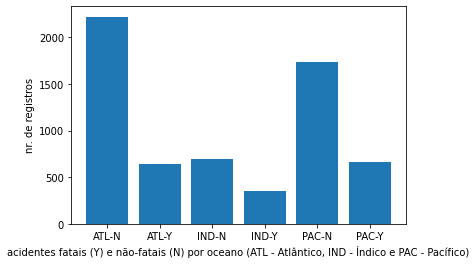

In [88]:
# gráfico com a quantidade de acidentes fatais (Y) e não-fatais (N) por oceano (ATL - Atlântico, IND - Índico e 
#                                                                               PAC - Pacífico)

contagem = f_shark[['fatal', 'ocean','date']].groupby(by=['ocean', 'fatal']).count().values[:,0]
rotulo = list(map(lambda label: label[0][0:3]+'-'+label[1], f_shark[['fatal', 'ocean','date']].groupby(by=['ocean', 'fatal']).count().index))

plt.bar(rotulo, contagem)
plt.xlabel('acidentes fatais (Y) e não-fatais (N) por oceano (ATL - Atlântico, IND - Índico e PAC - Pacífico)')
plt.ylabel('nr. de registros')

plt.show()

###  Avaliando a influência do gênero

In [89]:
f_shark[['fatal', 'ocean', 'sex', 'date']].groupby(by=['sex', 'ocean', 'fatal']).count()/6302*100

date
sex ocean          fatal           
F   ATLANTIC OCEAN N       4.807997
                   Y       0.714059
    INDIAN OCEAN   N       0.714059
                   Y       0.460171
    PACIFIC OCEAN  N       2.491273
                   Y       0.952079
M   ATLANTIC OCEAN N      30.434783
                   Y       9.409711
    INDIAN OCEAN   N      10.282450
                   Y       5.157093
    PACIFIC OCEAN  N      24.976198
                   Y       9.600127

In [90]:
f_shark.loc[(f_shark['fatal']=='N'), ['sex', 'ocean']].value_counts()

sex  ocean         
M    ATLANTIC OCEAN    1918
     PACIFIC OCEAN     1574
     INDIAN OCEAN       648
F    ATLANTIC OCEAN     303
     PACIFIC OCEAN      157
     INDIAN OCEAN        45
dtype: int64

In [91]:
f_shark.loc[(f_shark['fatal']=='Y'), ['sex', 'ocean']].value_counts()

sex  ocean         
M    PACIFIC OCEAN     605
     ATLANTIC OCEAN    593
     INDIAN OCEAN      325
F    PACIFIC OCEAN      60
     ATLANTIC OCEAN     45
     INDIAN OCEAN       29
dtype: int64

In [92]:
# porcentagem de incidentes fatais (Y) e não-fatais (N) por oceano e gênero

contagem = f_shark[['fatal', 'ocean','sex', 'date']].groupby(by=['fatal', 'ocean', 'sex']).count().values[:,0]
rotulo = list(f_shark[['fatal', 'ocean', 'sex', 'date']].groupby(by=['fatal', 'ocean', 'sex']).count().index)

oceano = []
fatal = []
genero = []

for fat, oce, gen in rotulo:
    genero.append(gen)
    oceano.append(oce)
    fatal.append(fat)

novo = np.array([fatal, oceano, genero, contagem], dtype=object).T

for i in range(len(novo)):
    novo[i, 3] = int(novo[i, 3]/(sum(contagem*(novo[:, 0] == novo[i, 0])))*10000)/100
    
print(novo)

[['N' 'ATLANTIC OCEAN' 'F' 6.52]
 ['N' 'ATLANTIC OCEAN' 'M' 41.29]
 ['N' 'INDIAN OCEAN' 'F' 0.96]
 ['N' 'INDIAN OCEAN' 'M' 13.95]
 ['N' 'PACIFIC OCEAN' 'F' 3.37]
 ['N' 'PACIFIC OCEAN' 'M' 33.88]
 ['Y' 'ATLANTIC OCEAN' 'F' 2.71]
 ['Y' 'ATLANTIC OCEAN' 'M' 35.78]
 ['Y' 'INDIAN OCEAN' 'F' 1.75]
 ['Y' 'INDIAN OCEAN' 'M' 19.61]
 ['Y' 'PACIFIC OCEAN' 'F' 3.62]
 ['Y' 'PACIFIC OCEAN' 'M' 36.51]]
